<a href="https://colab.research.google.com/github/nandana-03/Heart-Disease-Prediction-System/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [5]:
df.shape

(270, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

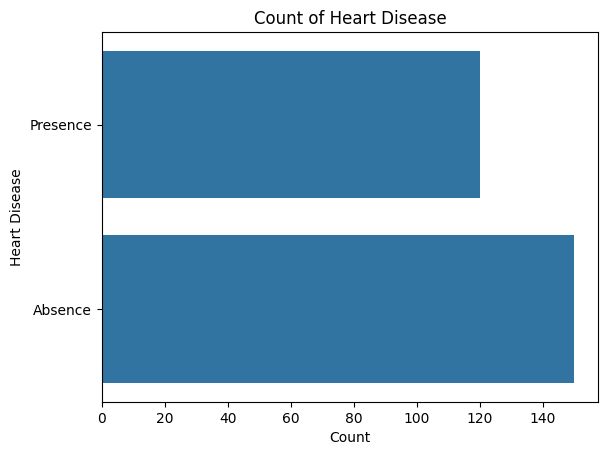

In [9]:
sns.countplot(df['Heart Disease'])
plt.ylabel('Heart Disease')
plt.xlabel('Count')
plt.title('Count of Heart Disease')
plt.show()

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X.shape

(270, 13)

In [12]:
y.shape

(270,)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 99)

In [14]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_split=10, random_state=10)

In [15]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=10)

In [16]:
X_train.shape

(216, 13)

In [17]:
y_train.shape

(216,)

In [18]:
clf.feature_importances_

array([0.06286439, 0.03785471, 0.15982586, 0.04946011, 0.05043436,
       0.00580725, 0.0086222 , 0.08354915, 0.03200771, 0.11912041,
       0.06919858, 0.15097601, 0.17027927])

In [19]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [20]:
y_pred = clf.predict(X_test)
y_pred

array(['Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence'],
      dtype=object)

In [21]:
print(y_test.head())

26     Absence
32     Absence
222    Absence
106    Absence
153    Absence
Name: Heart Disease, dtype: object


In [22]:

confusion_matrix(y_test,y_pred)

array([[26,  8],
       [ 4, 16]])

In [23]:
accuracy_score(y_test,y_pred)

0.7777777777777778

In [24]:
cross_val_score(clf,X_train,y_train,cv=10)

array([0.81818182, 0.95454545, 0.81818182, 0.90909091, 0.86363636,
       0.63636364, 0.9047619 , 0.76190476, 0.76190476, 0.95238095])

In [25]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

     Absence       0.76      0.87      0.81        30
    Presence       0.80      0.67      0.73        24

    accuracy                           0.78        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.78      0.78      0.77        54



In [47]:
input_data = (46,1,4,140,311,0,0,120,1,1.8,2,2,7)
numpy_array = np.asarray(input_data)
reshaped_array = numpy_array.reshape(1,-1)
prediction = clf.predict(reshaped_array)
print(prediction)

if(prediction[0] == 'Absence'):
  print("The person does not have a Heart Disease")
else:
  print("The person has a Heart Disease")

['Presence']
The person has a Heart Disease


In [53]:
#Logisstic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Absence       0.89      0.97      0.93        33
    Presence       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [57]:
input_data =  (46,1,4,140,311,0,0,120,1,1.8,2,2,7)
numpy_array = np.asarray(input_data)
reshaped_array = numpy_array.reshape(1,-1)
prediction = model.predict(reshaped_array)
print(prediction)

if(prediction[0] == 'Absence'):
  print("The person does not have a Heart Disease")
else:
  print("The person has a Heart Disease")

['Presence']
The person has a Heart Disease


In [63]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

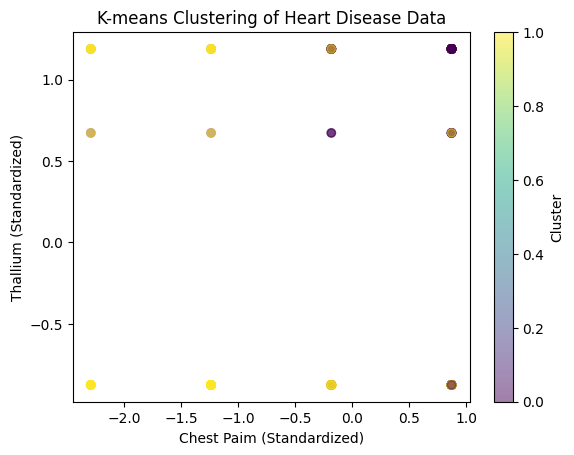

In [85]:
#K-means clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 2], X_scaled[:, -1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Chest Paim (Standardized)')
plt.ylabel('Thallium (Standardized)')
plt.title('K-means Clustering of Heart Disease Data')
plt.colorbar(label='Cluster')
plt.show()

In [86]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.17187526160030075
